***
## Project Roadmap:
#### 1. **Importing Packages:**
       - Import necessary packages
#### 2. **Defining File Paths and Loading Datasets:**
       - Define file paths for training, validation, and testing CSV files.
       - Load datasets and print the first few rows for verification.
#### 3. **Data Preprocessing:**
       - Split datasets into features (X) and labels (y).
       - Perform one-hot encoding on categorical features.
#### 4. **Exploring Data:**
       - Explore the distribution of numerical features and the frequency of categorical features.
#### 5. **Creating Random Forest Model:**
       - Create and train a Random Forest classifier.
#### 6. **Calculating Accuracy on Test Data:**
       - Concatenate dataframes for training, validation, and testing.
       - Split data back into training, validation, and testing sets.
       - Retrain the Random Forest model.
       - Calculate and print the accuracy score on the test data.
#### 7. **Making Predictions:**
       - Make predictions on the validation and testing data.
#### 8. **Evaluating Model Performance:**
       - Calculate accuracy and generate classification reports for both validation and testing data.
#### 9. **Visualizing Results:**
       - Visualize the confusion matrix and ROC curve.
#### 10. **Additional Analysis and Visualizations:**
       - Explore additional analyses, such as feature importance and predicted probabilities.
***


## Importing Packages:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report

## Defining File Paths and Loading Datasets:

In [2]:
# Define file paths
training_file = '/kaggle/input/pea-plant-dataset-csv-format/Dataset in CSV File/_annotations(train).csv'
validation_file = '/kaggle/input/pea-plant-dataset-csv-format/Dataset in CSV File/_annotations(valid).csv'
testing_file = '/kaggle/input/pea-plant-dataset-csv-format/Dataset in CSV File/_annotations(test).csv'

# Load datasets
training_data = pd.read_csv(training_file)
validation_data = pd.read_csv(validation_file)
testing_data = pd.read_csv(testing_file)

In [3]:
# Print first few rows of training_data
training_data.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,resized_194_jpg.rf.f4cd294f6ba11ebdc92a5099eb9...,1000,1000,POWDERY_MILDEW,180,74,973,967
1,resized_50_jpg.rf.f4e0e6ce84345e1988200e7992ab...,1000,1000,LEAFMINER,346,230,751,793
2,resized_201_jpg.rf.f4e26abdf4612f4ba8d158e8bd5...,1000,1000,FRESH_LEAF,203,414,797,813
3,resized_292_jpg.rf.f52949c4d6c03bf82eff078f5e9...,1000,1000,FRESH_LEAF,363,434,641,893
4,resized_193_jpg.rf.f4ed4ffde42755ba615d0e6fbfe...,1000,1000,FRESH_LEAF,0,0,377,300


In [4]:
# Print first few rows of validation_data
validation_data.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,resized_258_jpg.rf.015e45e64cfd9b4a3d3d2a9060e...,1000,1000,FRESH_LEAF,133,313,605,938
1,resized_92_jpg.rf.018c18d370c5e2a49c077185d42c...,1000,1000,FRESH_LEAF,336,305,746,938
2,resized_resized_87_jpg.rf.04cc210f87e0b6488fa0...,1000,1000,LEAFMINER,203,488,707,658
3,resized_337_jpg.rf.025e8874f82a598996874fc9010...,1000,1000,FRESH_LEAF,223,305,766,893
4,resized_resized_20_jpg.rf.01f89bf96162e91d1899...,1000,1000,LEAFMINER,516,555,582,594


In [5]:
# Print first few rows of testing_data
testing_data.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,resized_92_jpg.rf.032636ea55dfa0349f13dcba7d33...,1000,1000,DOWNY_MILDEW,191,145,617,951
1,resized_resized_158_jpg.rf.05b5bc3ce5a77c2e6ce...,1000,1000,LEAFMINER,559,430,766,588
2,resized_266_jpg.rf.063175d7bedc637af0669027092...,1000,1000,POWDERY_MILDEW,0,254,895,873
3,resized_resized_54_jpg.rf.07affce7ecfb67bf3a3e...,1000,1000,LEAFMINER,195,682,805,883
4,resized_42_jpg.rf.09b6d5a3704117e3ca4ac685d72d...,1000,1000,LEAFMINER,551,551,596,623


## Data Preprocessing:

In [6]:
# Split datasets into features and labels
X_train = training_data.drop('class', axis=1)
y_train = training_data['class']

# Perform one-hot encoding
X_train_encoded = pd.get_dummies(X_train)

# Print the shapes of encoded datasets
print("Training set shape:", X_train_encoded.shape, y_train.shape)


Training set shape: (8498, 2777) (8498,)


## Exploring Data:

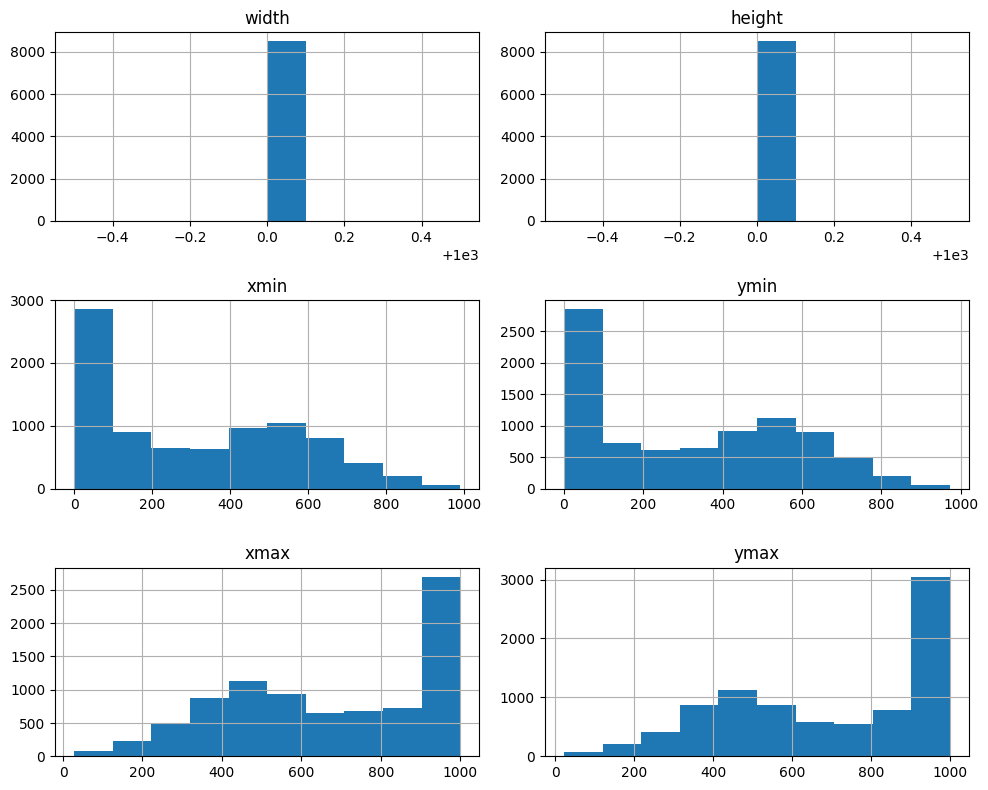

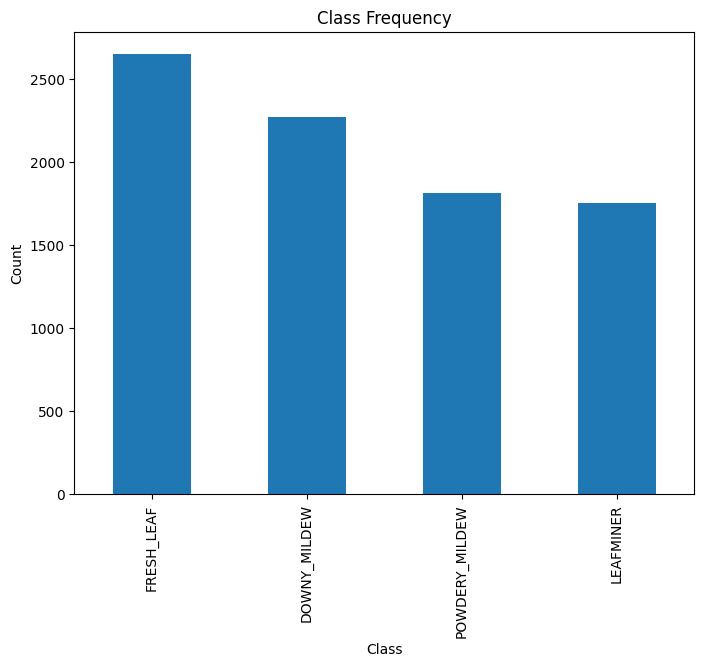

In [7]:
# Explore numerical features
numeric_features = ['width', 'height', 'xmin', 'ymin', 'xmax', 'ymax']
training_data[numeric_features].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Explore categorical features
categorical_features = ['class']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    plt.title(f"{feature.capitalize()} Frequency")
    training_data[feature].value_counts().plot(kind='bar')
    plt.xlabel(feature.capitalize())
    plt.ylabel("Count")
    plt.show()


## Creating Random Forest Model:

In [8]:
# Create Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=None, n_jobs=None)
rf_model.fit(X_train_encoded, y_train)


RandomForestClassifier()

## Calculating Accuracy on Test Data:

In [9]:
# Concatenate dataframes
combined_data = pd.concat([training_data, validation_data, testing_data], axis=0)

# Split data back into sets
X_train = combined_data[:len(training_data)].drop(['class', 'filename'], axis=1)
y_train = combined_data[:len(training_data)]['class']
X_validation = combined_data[len(training_data):len(training_data)+len(validation_data)].drop(['class', 'filename'], axis=1)
y_validation = combined_data[len(training_data):len(training_data)+len(validation_data)]['class']
X_test = combined_data[len(training_data)+len(validation_data):].drop(['class', 'filename'], axis=1)
y_test = combined_data[len(training_data)+len(validation_data):]['class']

# Retrain the RandomForestClassifier using the original feature names
rf_model = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Calculate the accuracy score on the test data
score = rf_model.score(X_test, y_test)
print("Accuracy score on the test data: {:.2f}".format(score))


Accuracy score on the test data: 0.64


## Making Predictions:

In [10]:
# Make predictions on validation and testing data
val_predictions = rf_model.predict(X_validation)
test_predictions = rf_model.predict(X_test)

In [11]:
# print(val_predictions)
# print(test_predictions)

## Evaluating Model Performance:

In [12]:
# Calculate accuracy on validation data
val_accuracy = accuracy_score(y_validation, rf_model.predict(X_validation))
print("Validation Accuracy:", val_accuracy)

# Generate a classification report for the validation data
val_report = classification_report(y_validation, rf_model.predict(X_validation))
print("Validation Report:")
print(val_report)
print('\n')

# Calculate accuracy on testing data
test_accuracy = accuracy_score(y_test, rf_model.predict(X_test))
print("Testing Accuracy:", test_accuracy)

# Generate a classification report for the testing data
test_report = classification_report(y_test, rf_model.predict(X_test))
print("Testing Report:")
print(test_report)


Validation Accuracy: 0.5916666666666667
Validation Report:
                precision    recall  f1-score   support

  DOWNY_MILDEW       0.50      0.40      0.45        82
    FRESH_LEAF       0.48      0.65      0.55        78
     LEAFMINER       0.77      0.83      0.80       109
POWDERY_MILDEW       0.55      0.43      0.48        91

      accuracy                           0.59       360
     macro avg       0.57      0.58      0.57       360
  weighted avg       0.59      0.59      0.58       360



Testing Accuracy: 0.6424242424242425
Testing Report:
                precision    recall  f1-score   support

  DOWNY_MILDEW       0.55      0.37      0.44        49
    FRESH_LEAF       0.55      0.82      0.66        40
     LEAFMINER       0.84      0.84      0.84        44
POWDERY_MILDEW       0.64      0.56      0.60        32

      accuracy                           0.64       165
     macro avg       0.64      0.65      0.63       165
  weighted avg       0.64      0.64      

## Visualizing Results:

* Confusion Matrix

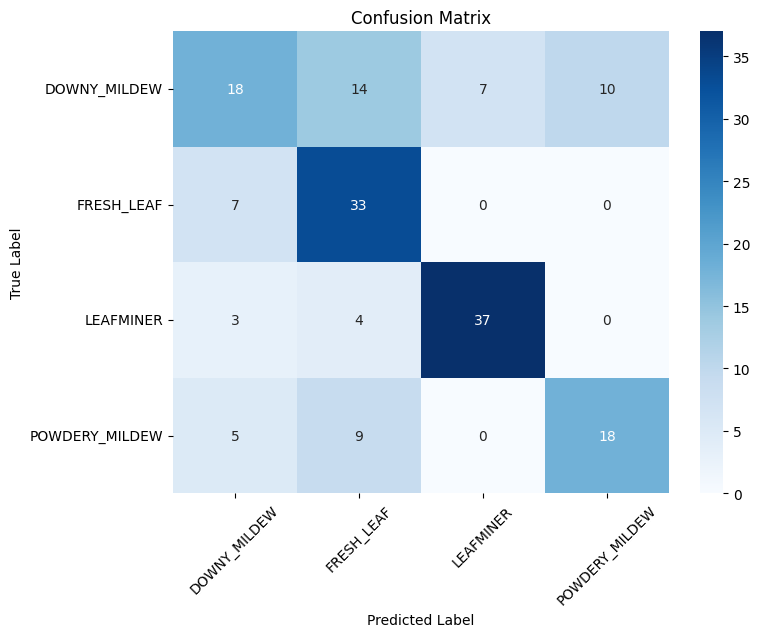

In [13]:
# Define class names based on unique classes in the dataset
class_names = np.unique(y_test)

# Visualize confusion matrix
confusion_mat = confusion_matrix(y_test, rf_model.predict(X_test))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, rotation=45)
plt.yticks(ticks=np.arange(len(class_names))+0.5, labels=class_names, rotation=0)
plt.show()


* ROC Curve

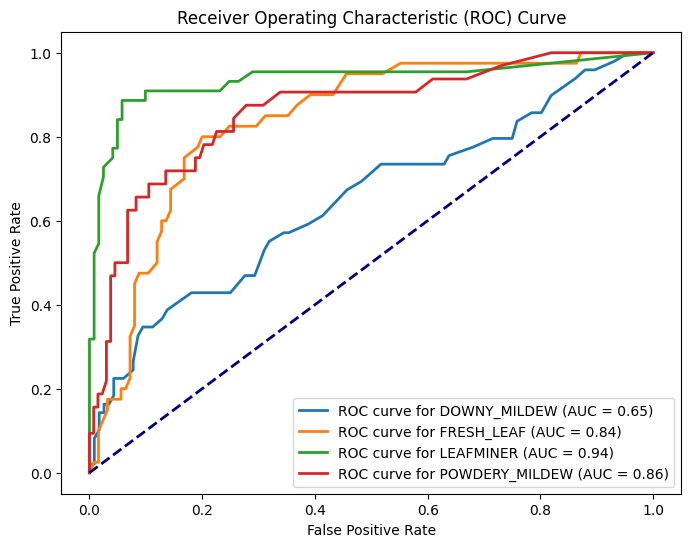

In [14]:
# Assuming you have a trained RandomForestClassifier model called rf_model
class_names = np.unique(y_test)
y_pred_prob = rf_model.predict_proba(X_test)

# Plot the ROC curve
plt.figure(figsize=(8, 6))

for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve((y_test == class_names[i]).astype(int), y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve for {class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Additional Analysis and Visualizations:

Feature Importance:
1. xmin: 0.2519513537879313
2. xmax: 0.2517523356630194
3. ymax: 0.250023484125616
4. ymin: 0.24627282642343334
5. height: 0.0
6. width: 0.0


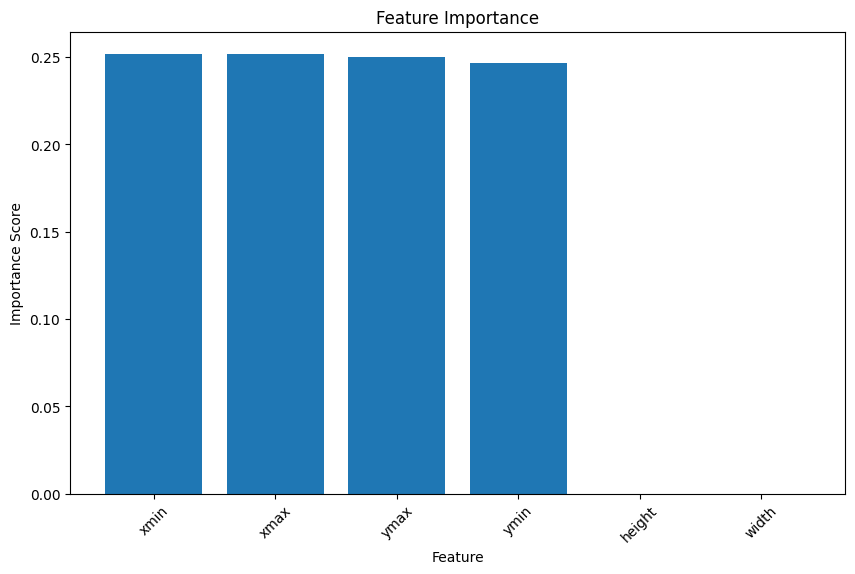

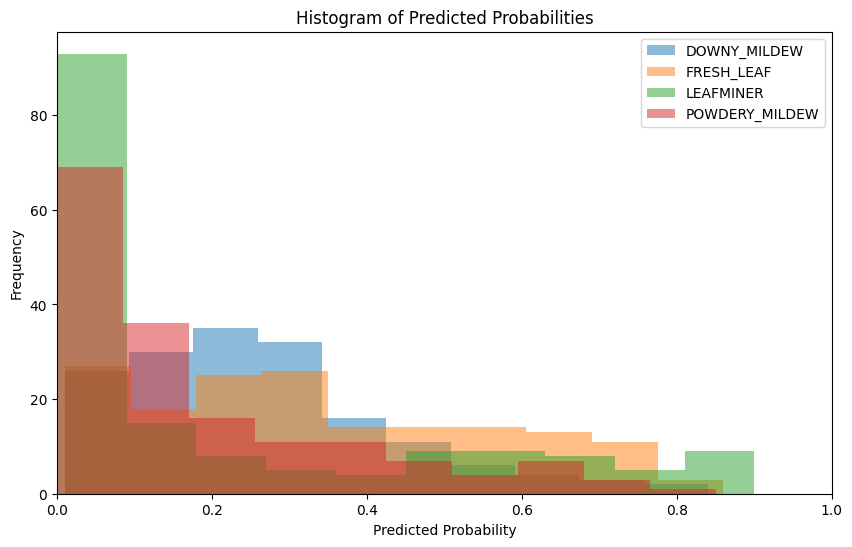

In [15]:
# Feature Importance
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

# Print feature importance
print("Feature Importance:")
for i, idx in enumerate(sorted_idx):
    print(f"{i + 1}. {X_test.columns[idx]}: {feature_importance[idx]}")

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.bar(range(X_test.shape[1]), feature_importance[sorted_idx], align="center")
plt.xticks(range(X_test.shape[1]), X_test.columns[sorted_idx], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importance")
plt.show()

# Predicted Probabilities Visualization
# trained RandomForestClassifier model called `rf_model`
class_names = np.unique(y_test)
y_pred_prob = rf_model.predict_proba(X_test)

# Plot the histogram of predicted probabilities for each class
plt.figure(figsize=(10, 6))

for i in range(len(class_names)):
    plt.hist(y_pred_prob[:, i], bins=10, alpha=0.5, label=class_names[i])

plt.xlim(0, 1)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()
